<a href="https://colab.research.google.com/github/cruz-marco/dex_files/blob/main/assign_clust01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Assign_clustering/clusterass01.csv').drop(columns=['ID'])

In [ ]:
df.head()

,0,1,2,3,4
0,3.405796,1.892352,6.583574,10.217911,-0.398558
1,0.151727,3.496869,-1.604790,-0.494007,-1.033372
2,7.973214,-0.133358,-0.778063,13.774881,-11.405228
3,-11.562401,-13.313848,6.665286,8.450175,8.277822
4,3.528421,6.953815,2.465933,0.987932,3.152346


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df)

StandardScaler()

In [ ]:
df_sc = pd.DataFrame(data=scaler.transform(df), columns = df.columns)

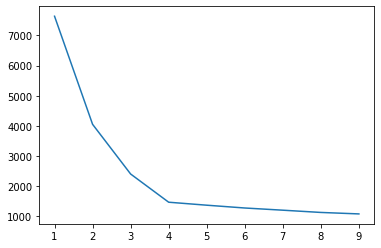

In [ ]:
inertia_list = list()
for n_clust in range(1, 10):
  km_model = KMeans(n_clusters=n_clust)
  km_model.fit(df_sc)
  inertia_list.append(km_model.inertia_)

sns.lineplot(x=range(1, 10), y=inertia_list)
plt.show()

In [ ]:
kmc = KMeans(4, random_state=123)

In [ ]:
kmc.fit(df_sc)

KMeans(n_clusters=4, random_state=123)

In [ ]:
df['kmc'] = kmc.predict(df_sc)
df['kmc'] = df['kmc'].astype('category')

In [ ]:
df['kmc'].value_counts()

1    384
0    382
3    382
2    380
Name: kmc, dtype: int64

In [ ]:
dbsc = DBSCAN(eps=0.8, min_samples=10)

In [ ]:
df['dbs'] = dbsc.fit_predict(df_sc)
df['dbs'] = df['dbs'].astype('category')

In [ ]:
df['dbs'].value_counts()

0     1140
1      378
-1      10
Name: dbs, dtype: int64

In [ ]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean')

In [ ]:
df['hc'] = hc.fit_predict(df_sc)
df['hc'] = df['hc'].astype('category')

In [ ]:
df['hc'].value_counts()

2    392
1    382
0    381
3    373
Name: hc, dtype: int64